Make data for regression

In [1]:
from sklearn.datasets import make_regression

In [2]:
import torch
from torch import nn, optim

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
nb_features = 1
nb_samples = 1000

X, y = make_regression(nb_samples, nb_features, noise=10)

In [5]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((nb_samples, nb_features))).float()

Typical procedure is to define classes for each of the model architectures

In [6]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)        

Instantiate the model, set up an optimizer and the criterion

In [7]:
model = LinearRegression(nb_features)
optimizer = optim.SGD(model.parameters(), lr = 0.5)
criterion = nn.MSELoss()

The main training loop begins...

Epoch:  0 Loss:  100.56817626953125
Epoch:  1 Loss:  100.56817626953125
Epoch:  2 Loss:  100.56817626953125
Epoch:  3 Loss:  100.56817626953125
Epoch:  4 Loss:  100.56817626953125
Epoch:  5 Loss:  100.56817626953125
Epoch:  6 Loss:  100.56817626953125
Epoch:  7 Loss:  100.56817626953125
Epoch:  8 Loss:  100.56817626953125
Epoch:  9 Loss:  100.56817626953125
Epoch:  10 Loss:  100.56817626953125
Epoch:  11 Loss:  100.56817626953125
Epoch:  12 Loss:  100.56817626953125
Epoch:  13 Loss:  100.56817626953125
Epoch:  14 Loss:  100.56817626953125
Epoch:  15 Loss:  100.56817626953125
Epoch:  16 Loss:  100.56817626953125
Epoch:  17 Loss:  100.56817626953125
Epoch:  18 Loss:  100.56817626953125
Epoch:  19 Loss:  100.56817626953125
Epoch:  20 Loss:  100.56817626953125
Epoch:  21 Loss:  100.56817626953125
Epoch:  22 Loss:  100.56817626953125
Epoch:  23 Loss:  100.56817626953125
Epoch:  24 Loss:  100.56817626953125
Epoch:  25 Loss:  100.56817626953125
Epoch:  26 Loss:  100.56817626953125
Epoch:  27 

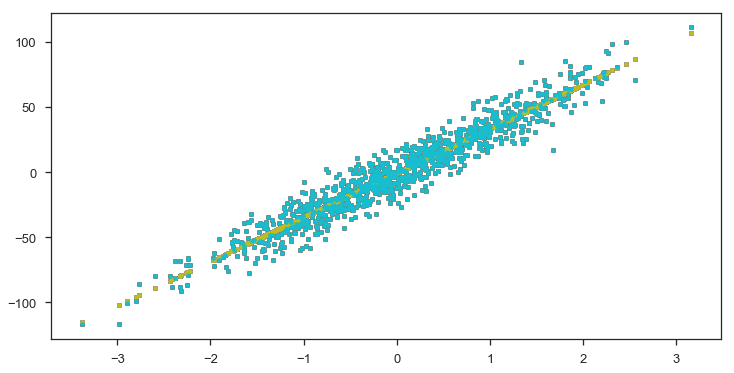

In [11]:
for epoch in range(50):
    
    model.train()
    optimizer.zero_grad()


    y_pred = model(X)
    loss = criterion(y_pred, y)

    loss.backward()
    
    print('Epoch: ', epoch, 'Loss: ', loss.item())

    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
        plt.plot(X.numpy(), y_pred.numpy(), '.', label='predicted')
        plt.plot(X.numpy(), y.numpy(), '.', label='actual')